(150, 4) (150,)


<IPython.core.display.Javascript object>


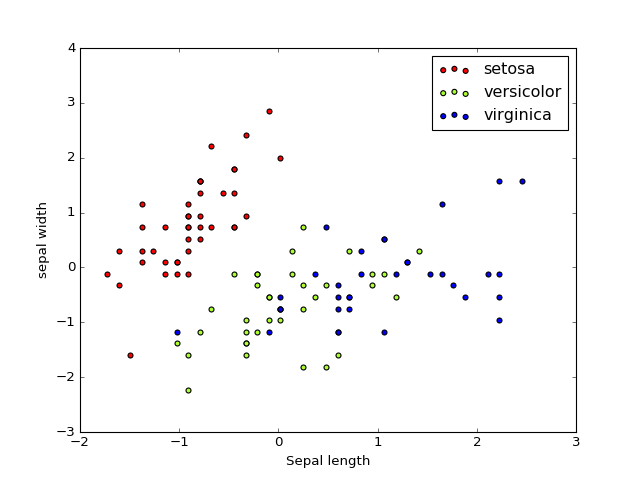

In [18]:
%run 'Preprocessing'

In [20]:
# Use Stochastic Gradient Descent searching for local minimum of the hyperplane
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [22]:
print(clf.coef_)

[[-33.03434091  15.06870628]
 [ -5.45692175 -16.13465978]
 [ 15.02649915  -0.75101269]]


In [24]:
print(clf.intercept_)

[-17.36170487 -15.48402748   2.04086319]


<IPython.core.display.Javascript object>


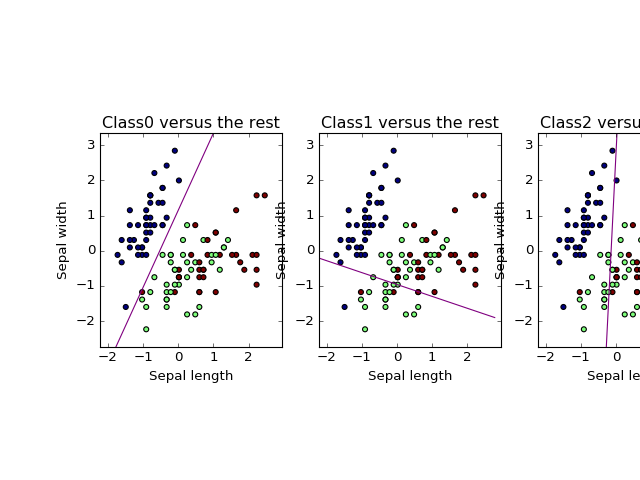

In [37]:
# Plot the decision boudaries
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)
for i in [0, 1, 2]:
    # set axis same scaling from data to plot units for x and y
    axes[i].set_aspect('equal')
    axes[i].set_title('Class' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    # Set the current axes to be axes[i] and return axes[i]
    plt.sca(axes[i])
    # cmap: color map option
    plt.scatter(X_train[:,0], X_train[:,1], c = y_train,
               cmap = plt.cm.jet)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i,0])/clf.coef_[i,1]
    plt.plot(xs,ys,hold = True,c = "purple")

In [41]:
# Predict with new data
print(clf.predict(scaler.transform([[4.7,3.1]])))
# Print the distance between the new point and the boundary line
print(clf.decision_function(scaler.transform([[4.7,3.1]])))

[0]
[[ 25.66790827 -10.1344882  -16.95594631]]


In [49]:
# Evaluate the results with in-sample data
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print (metrics.accuracy_score(y_train, y_train_pred))
# Evaluate the results with test data
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred))
##### precision = TP/(TP + FP), Recall = TP/(TP + FN), FP: Target -, Prediction +
print(metrics.classification_report(y_test, y_test_pred, target_names = iris.target_names))

0.741071428571
0.684210526316
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.00      0.00      0.00        11
  virginica       0.62      0.95      0.75        19

avg / total       0.52      0.68      0.59        38

